## Зимин Евгений Евгеньевич

### О ЛР:

- scikit-learn & decision trees
- Coding decision tree & Categorical features


----

#### Самостоятельная оценка результатов

Для удобства проверки, исходя из набора решенных задач, посчитайте свою максимальную оценку.

**Оценка**: 5/5

***DeadLine - 21.05.2024 23:59***

### Формат сдачи
Задания сдаются через lms. Вы прикрепляете **ССЫЛКУ НА ПУБЛИЧНЫЙ РЕПОЗИТОРИЙ**, где выполнено ваше задание. Иначе задание не проверяется.




### Оценивание и штрафы


Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 5 баллов.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты не могут получить за него больше 0 баллов.

Неэффективная реализация кода может негативно отразиться на оценке.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

sns.set(style="whitegrid")

import warnings

warnings.filterwarnings("ignore")

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [2]:
from sklearn.datasets import make_moons, make_circles, make_classification

datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(
        n_classes=3,
        n_clusters_per_class=1,
        n_features=2,
        class_sep=0.8,
        random_state=3,
        n_redundant=0,
    ),
]

In [3]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

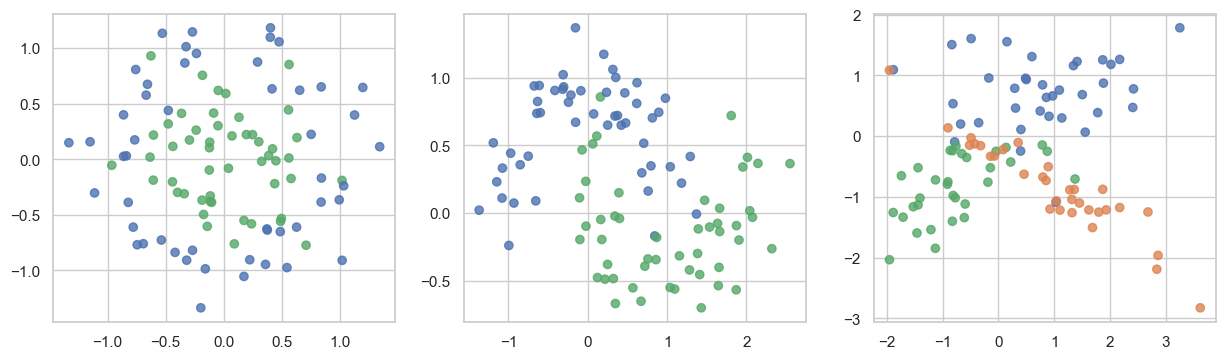

In [4]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=0.8)

__Задание 1. [0.5 балла]__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [5]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(
        X[:, 0],
        X[:, 1],
        c=y,
        cmap=cmap,
        alpha=0.7,
        edgecolors=np.array(palette)[y],
        linewidths=2,
    )
    plt.show()

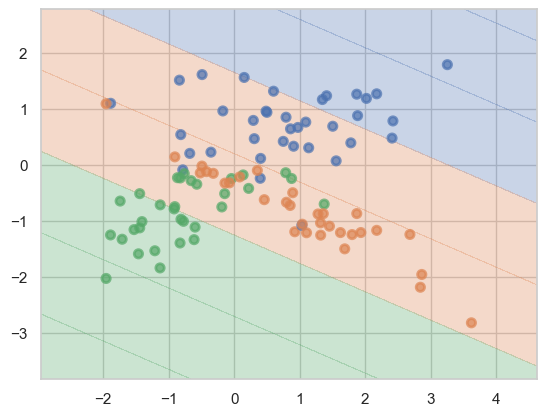

In [6]:
# Пример:
from sklearn.linear_model import LinearRegression

X, y = datasets[2]
lr = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

Dataset: make_circles
Train accuracy: 1.00
Test accuracy: 0.70
Difference: 0.30


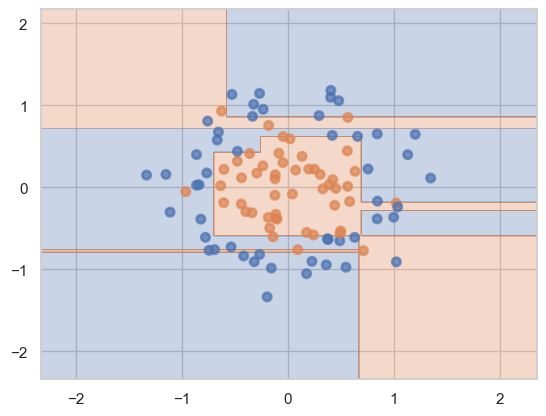

Dataset: make_moons
Train accuracy: 1.00
Test accuracy: 0.95
Difference: 0.05


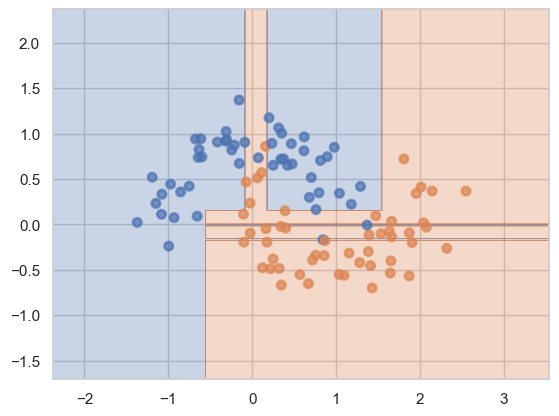

Dataset: make_classification
Train accuracy: 1.00
Test accuracy: 0.70
Difference: 0.30


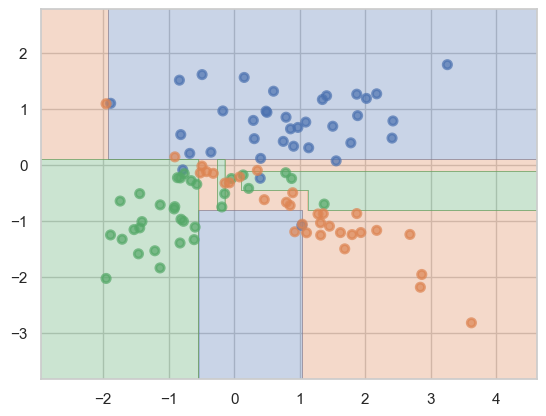

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

def tree_training_and_evaluation(X, y, max_depth=None, min_samples_leaf=1):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    dtc = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    dtc.fit(X_train, y_train)

    train_accuracy = dtc.score(X_train, y_train)
    test_accuracy = dtc.score(X_test, y_test)

    return train_accuracy, test_accuracy, dtc

datasets_names = ['make_circles', 'make_moons', 'make_classification']

for i, dataset in enumerate(datasets):
    X, y = dataset
    train_acc, test_acc, dtc = tree_training_and_evaluation(X, y)
    print(f"Dataset: {datasets_names[i]}")
    print(f"Train accuracy: {train_acc:.2f}")
    print(f"Test accuracy: {test_acc:.2f}")
    print(f"Difference: {train_acc - test_acc:.2f}")
    plot_surface(dtc, X, y)

__Ответ:__ деревья сильно переобучились, поскольку есть очень маленькие области для конкретных точек.

__Задание 2. [0.75 балла]__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

Dataset: make_circles
max_depth=2: Train acc=0.81, Test acc=0.60


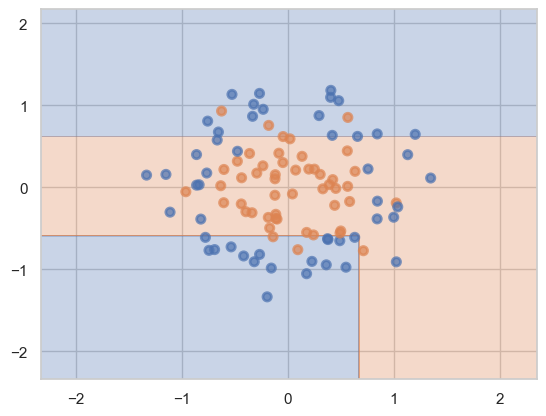

max_depth=5: Train acc=0.97, Test acc=0.75


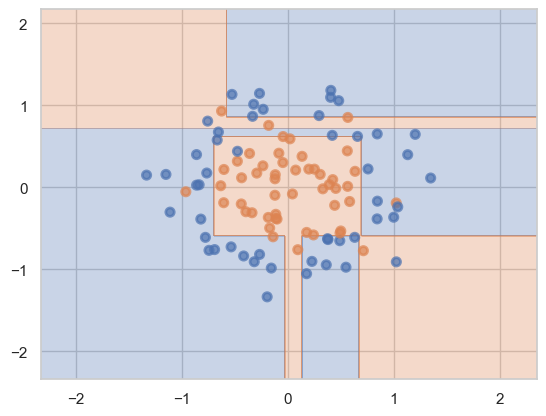

max_depth=10: Train acc=1.00, Test acc=0.65


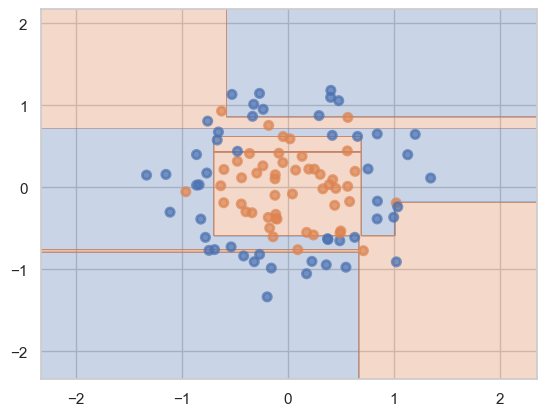

max_depth=None: Train acc=1.00, Test acc=0.65


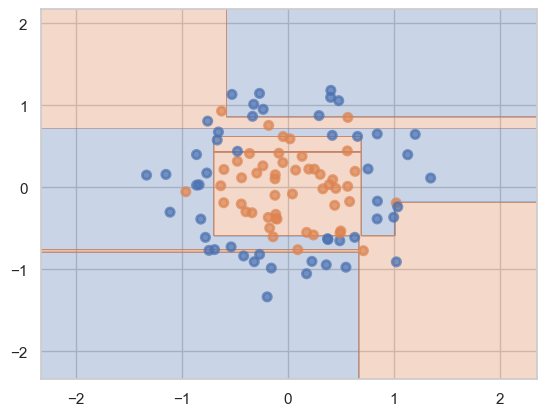

min_samples_leaf=1: Train acc=1.00, Test acc=0.65


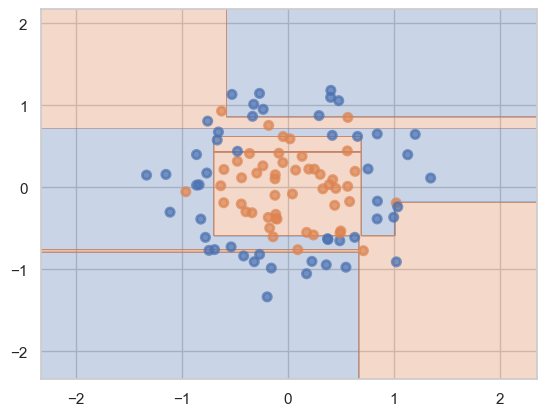

min_samples_leaf=5: Train acc=0.91, Test acc=0.85


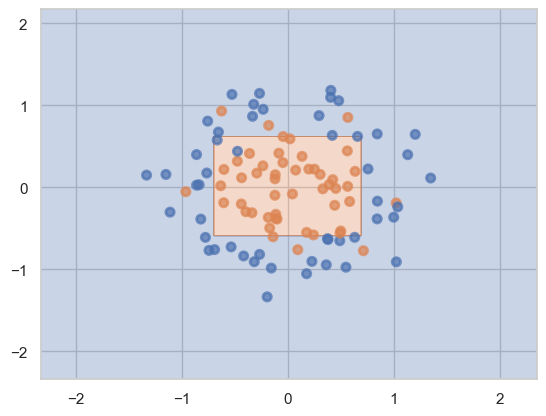

min_samples_leaf=10: Train acc=0.82, Test acc=0.90


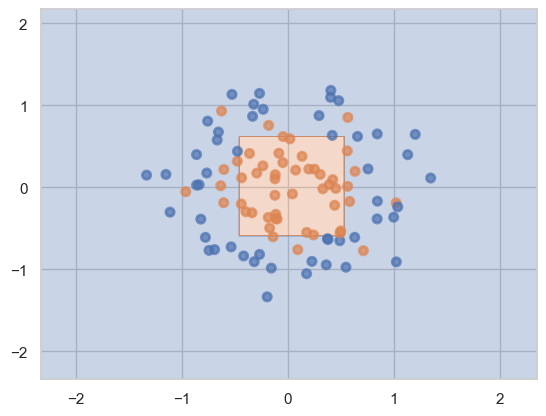


Dataset: make_moons
max_depth=2: Train acc=0.91, Test acc=1.00


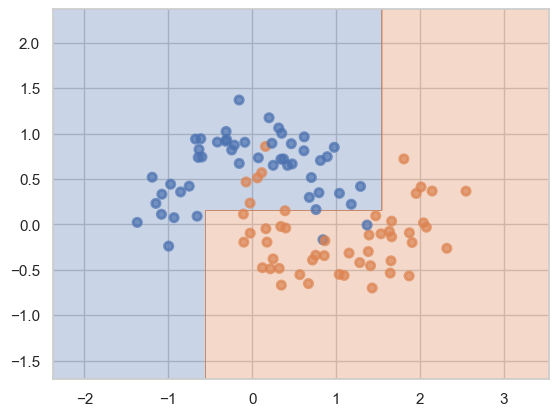

max_depth=5: Train acc=0.99, Test acc=0.95


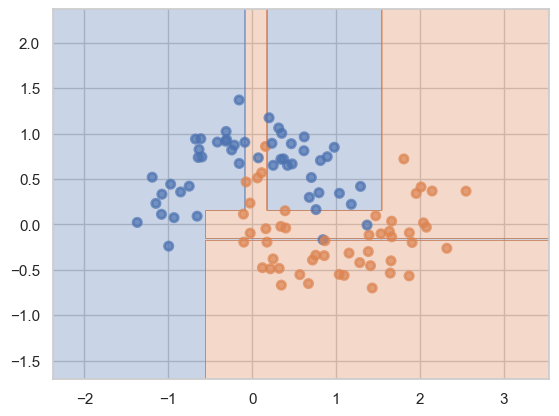

max_depth=10: Train acc=1.00, Test acc=0.95


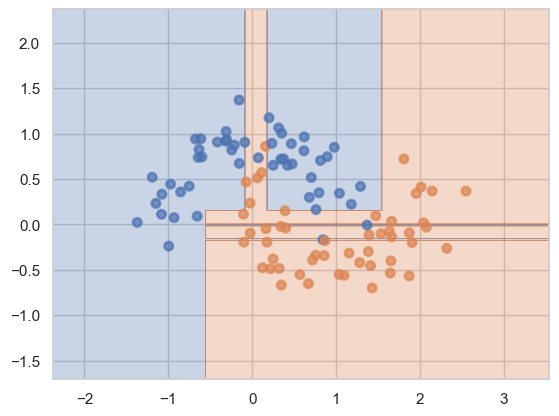

max_depth=None: Train acc=1.00, Test acc=0.95


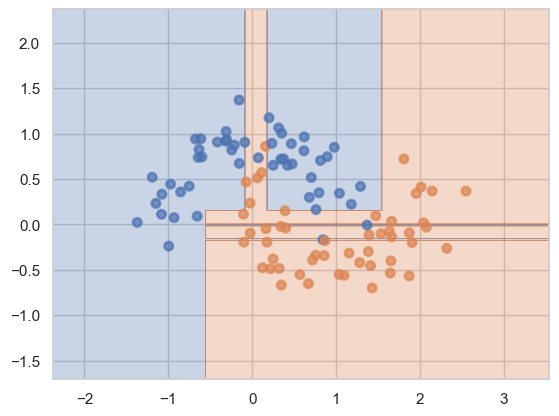

min_samples_leaf=1: Train acc=1.00, Test acc=0.95


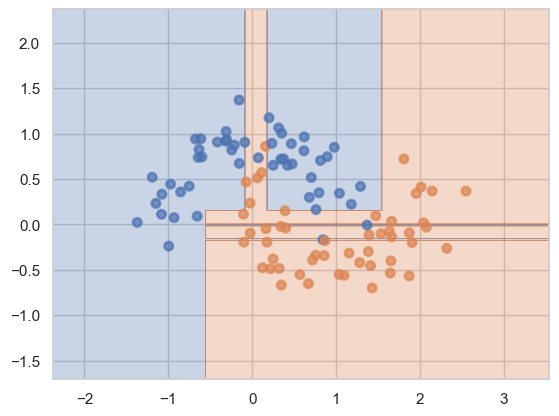

min_samples_leaf=5: Train acc=0.95, Test acc=0.80


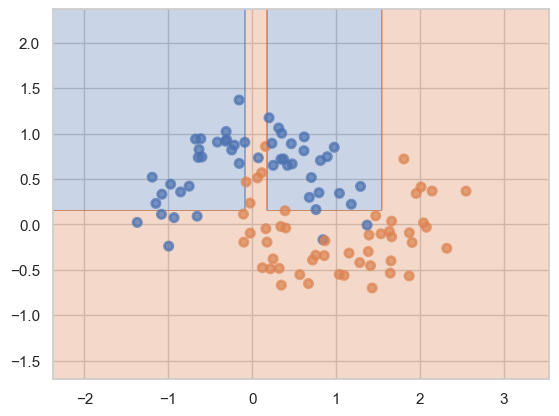

min_samples_leaf=10: Train acc=0.84, Test acc=0.85


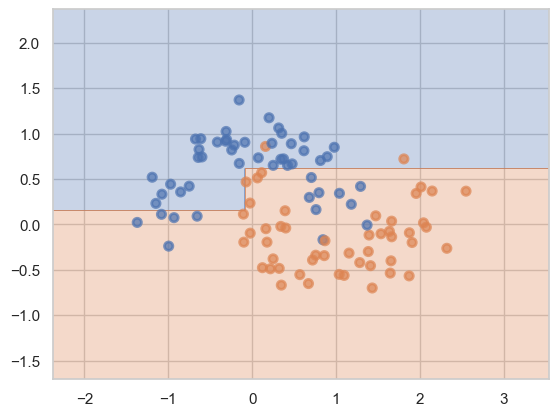


Dataset: make_classification
max_depth=2: Train acc=0.90, Test acc=0.75


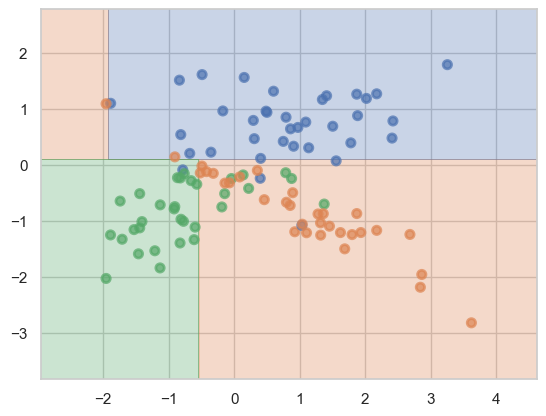

max_depth=5: Train acc=0.94, Test acc=0.70


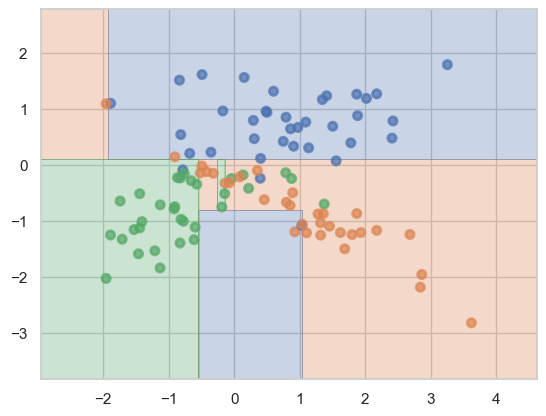

max_depth=10: Train acc=1.00, Test acc=0.70


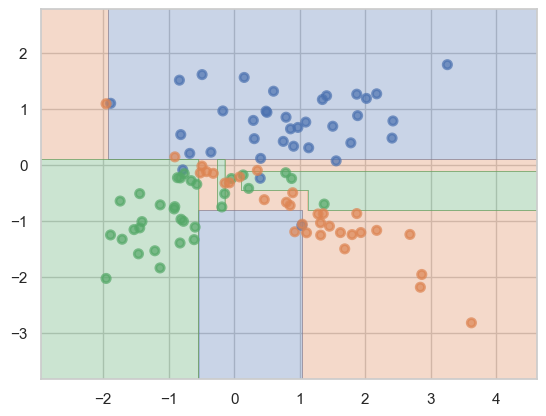

max_depth=None: Train acc=1.00, Test acc=0.70


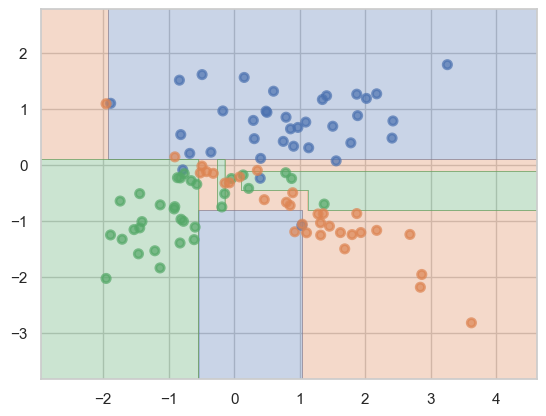

min_samples_leaf=1: Train acc=1.00, Test acc=0.70


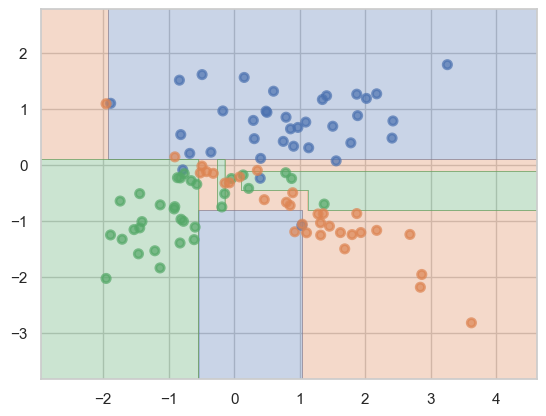

min_samples_leaf=5: Train acc=0.90, Test acc=0.70


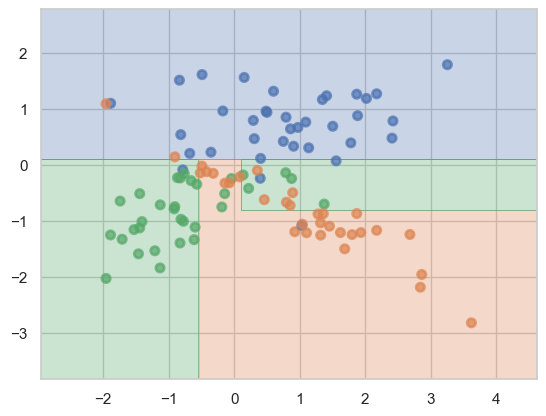

min_samples_leaf=10: Train acc=0.89, Test acc=0.75


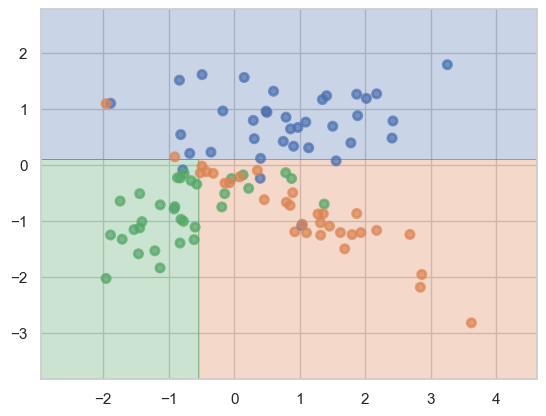

In [8]:
for i, dataset in enumerate(datasets):
    X, y = dataset
    print(f"Dataset: {datasets_names[i]}")

    for max_depth in [2, 5, 10, None]:
        train_acc, test_acc, dtc = tree_training_and_evaluation(X, y, max_depth=max_depth)
        print(f"max_depth={max_depth}: Train acc={train_acc:.2f}, Test acc={test_acc:.2f}")
        plot_surface(dtc, X, y)
        
    for min_samples_leaf in [1, 5, 10]:
        train_acc, test_acc, dtc = tree_training_and_evaluation(X, y, min_samples_leaf=min_samples_leaf)
        print(f"min_samples_leaf={min_samples_leaf}: Train acc={train_acc:.2f}, Test acc={test_acc:.2f}")
        plot_surface(dtc, X, y)

    print()

__Ответ:__ при увеличении глубины происходит разделяющая поверхность становится все более-более "кусочной", при установлении `max_depth = None` происходит переобучение (появляются маленькие области для точек). При этом обобщающая способность сначала увеличивается (поскольку при маленькой глубине поверхность очень простая, модель явно недообучена), а далее уменьшается, ибо начинается переобучение. Это видно на всех датасетах.

При увеличении `min_samples_leaf`, наоборот, разделяющая поверхность упрощается, то есть снижается склонность модели к переобучению, увеличивается обобщающая способность (скор на валидации).

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. [0.75 балл]__

Реализуйте функцию `find_best_split` из модуля `tree_code.py`

__Задание 4. [0.25 балла]__

`students.csv` - это преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). Первые пять столбцов содержат признаки каждого объекта, а последний столбец — целевую переменную (класс: 0 или 1). Нужно построить график, который на одном изображении отобразит пять кривых "порог — значение критерия Джини" для всех пяти признаков. Кроме того, стоит отдельно визуализировать scatter-графики "значение признака — класс" для каждого из пяти признаков.

Это нужно и для выявления значимости признаков, и для пороговых значений. Да и глазу приятно

In [9]:
df = pd.read_csv('students.csv')
df.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0


In [10]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

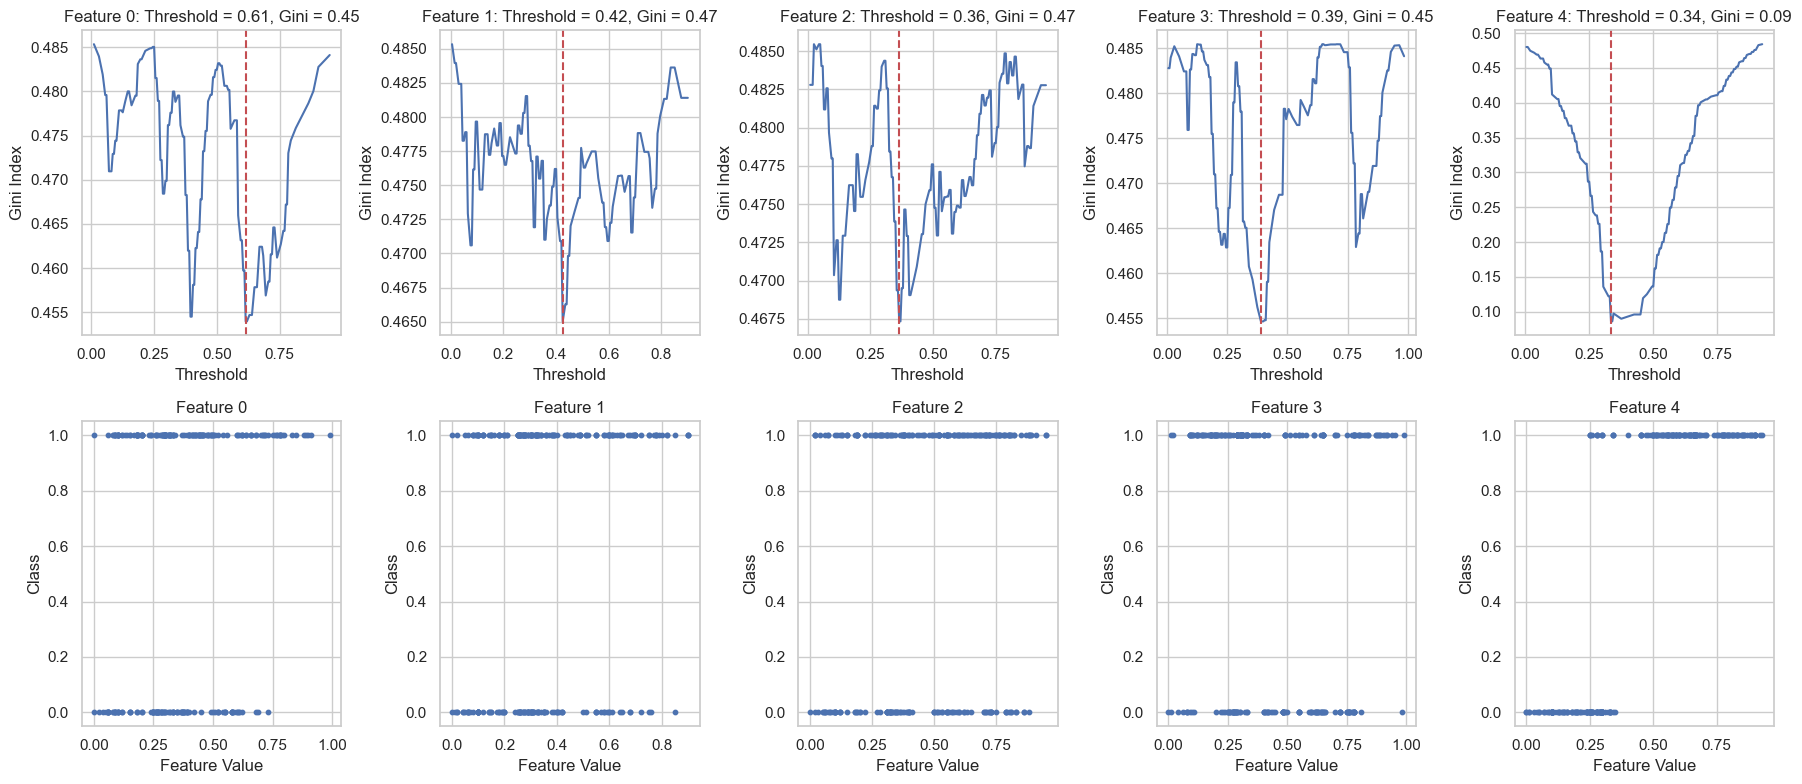

In [11]:
%load_ext autoreload
%autoreload 2

from tree_code import find_best_split

def plot_gini_and_scatter(X, y):
    fig, axes = plt.subplots(2, 5, figsize=(18, 8))

    for i in range(X.shape[1]):
        # Построение графика "порог - значение критерия Джини"
        thresholds, ginis, threshold_best, gini_best = find_best_split(X[:, i], y)
        axes[0, i].plot(thresholds, ginis)
        axes[0, i].axvline(x=threshold_best, color='r', linestyle='--')
        axes[0, i].set_title(f"Feature {i}: Threshold = {threshold_best:.2f}, Gini = {gini_best:.2f}")
        axes[0, i].set_xlabel("Threshold")
        axes[0, i].set_ylabel("Gini Index")

        # Построение scatter-графика "значение признака - класс"
        axes[1, i].scatter(X[:, i], y, s=10)
        axes[1, i].set_title(f"Feature {i}")
        axes[1, i].set_xlabel("Feature Value")
        axes[1, i].set_ylabel("Class")

    plt.tight_layout()
    plt.show()
    
plot_gini_and_scatter(X, y)    

__Задание 5. [0.25 балла]__

На основании кривых критерия Джини, по какому признаку стоит разделить выборку на два поддерева? Совпадает ли этот выбор с визуальной оценкой scatter-графиков? Как бы вы описали вид кривой для "хороших" признаков, по которым выборка делится почти идеально, и чем кривые таких признаков отличаются от кривых признаков, по которым разделение практически невозможно?

**Ответ:** при построении решающего дерева мы должны выбирать порог, который приводит к минимальному значению критерия Джини. Таким образом, на основе графиков выше разбиение по Feature 4 (PEG) обладает наименьшим значением критерием Джини, что кстати видно и по scatter-графику значений признака, где визуально можно провести разделяющую прямую, соответствующую порогу.

Вид кривой для "хороших" признаков скорее всего имеет вид идеальной параболы, ветви которой направлены вверх, в которой есть минимум, соответствующий наименьшему критерию Джини, а значение аргумента - порогу разбиения.

Кривые, по которым разделение невозможно, как видно из графиков выше - имеют множество спайков, точек локального минимума.

__Задание 6. [0.75 балла].__

Разберитесь с уже написанным кодом в классе DecisionTree модуля tree_code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в лекции. Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».




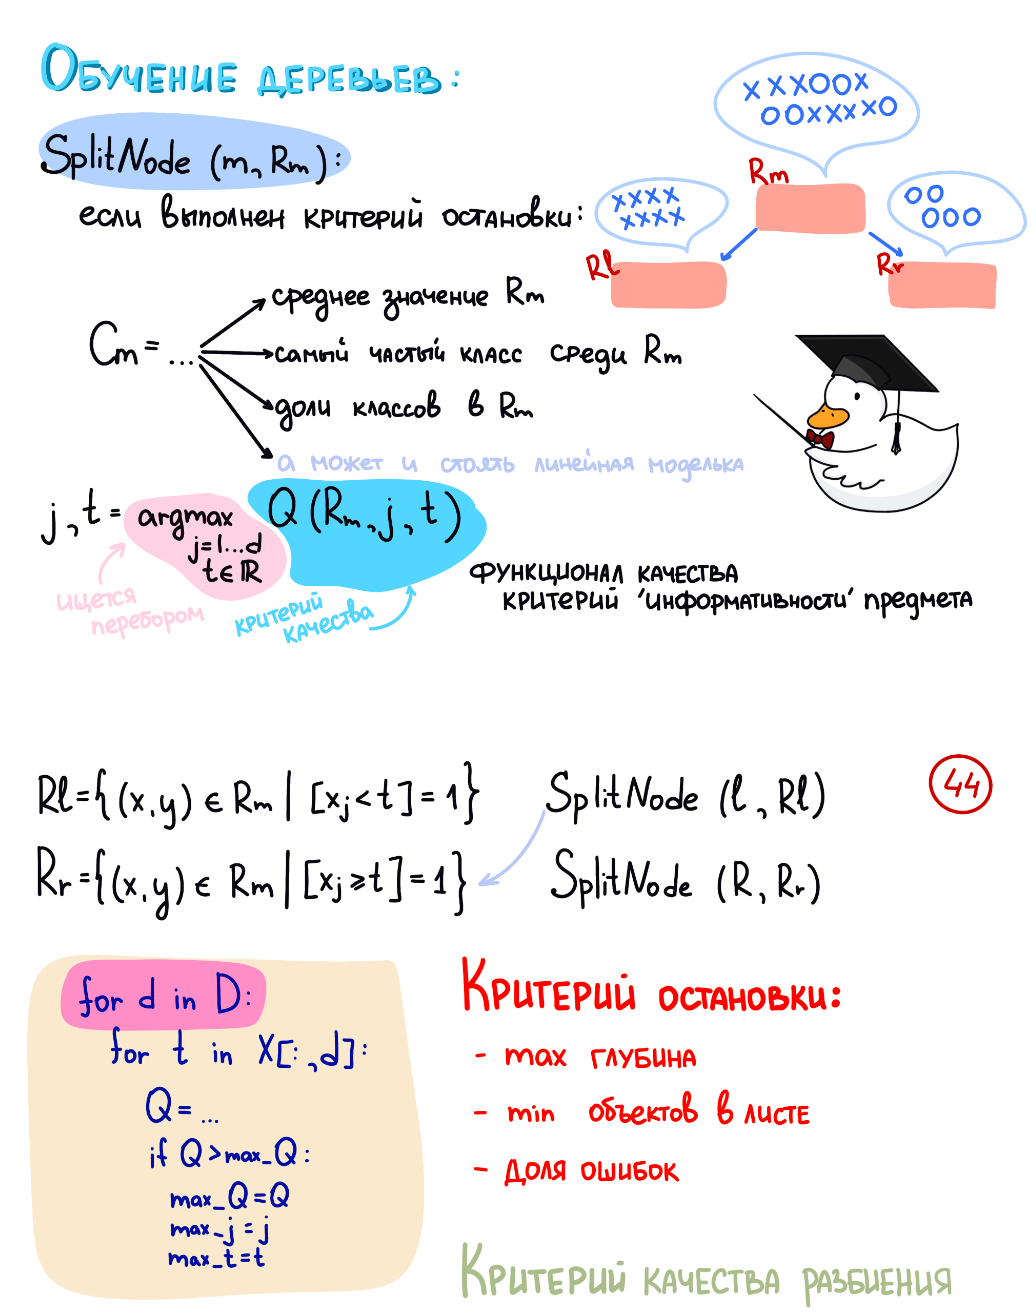

__Задание 7. [0.25 балла]__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно открыть` agaricus-lepiota.data`, прочитать ее с помощью pandas (не забудьте про `agaricus-lepiota.names`), применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

_SPOILER: У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево_

In [74]:
df = pd.read_csv('agaricus-lepiota.data', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [78]:
from sklearn.preprocessing import LabelEncoder
from tree_code import DecisionTree
from sklearn.metrics import accuracy_score, make_scorer

# Преобразование категориальных признаков в числовые
df = df.apply(LabelEncoder().fit_transform)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:].values, df.iloc[:, 0].values, 
                                                    test_size=0.5, random_state=42)

# Обучение модели
dt = DecisionTree(['categorical'] * X_train.shape[1])
dt.fit(X_train, y_train)

# Оценка качества на тестовой выборке
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


__Задание 8. [1 балл]__

Загрузите следующие наборы данных, предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names):
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце)
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце, датасет лежит на гитхабе вместе с заданием)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

**Задача**:

Закодировать категориальные признаки в наборе данных с использованием `LabelEncoder`. Затем, применив `cross_val_score` (cv=10), оценить метрику accuracy для следующих алгоритмов:

1. **DecisionTree**, обрабатывающий все признаки как вещественные.
2. **DecisionTree**, обрабатывающий все признаки как категориальные.
3. **DecisionTree**, обрабатывающий все признаки как вещественные + one-hot encoding всех признаков.
4. **DecisionTreeClassifier** из `sklearn`.

**Инструкция**:
1. Закодировать категориальные признаки с помощью `LabelEncoder`.
2. Оценить accuracy, используя `cross_val_score` (cv=10) и `scoring=make_scorer(accuracy_score)`.
3. Если позволяет память, установить параметр `sparse=False` в `OneHotEncoder`.
4. Результаты сохранить в `pd.DataFrame` (по строкам — наборы данных, по столбцам — алгоритмы).

**Рекомендации**:
- Для вычисления точности используйте `scoring=make_scorer(accuracy_score)` из `sklearn.metrics`.

`cross_val_score` из sklearn сильно ругается на самописные классы, поэтому сами реализуем кросс-валидацию.

In [126]:
# подготовка данных

# 1. mashrooms
mashrooms_data = pd.read_csv('agaricus-lepiota.data', header=None)
mashrooms_data = mashrooms_data.apply(LabelEncoder().fit_transform)

# 2. tic-tac-toe
tictactoe_data = pd.read_csv('tic-tac-toe-endgame.csv')
tictactoe_data['V10'] = tictactoe_data['V10'].isin(['positive']).astype(int)
tictactoe_data = tictactoe_data.apply(LabelEncoder().fit_transform)

# 3. car
car_data = pd.read_csv('car.data', header=None)
car_data[6] = car_data[6].isin(['vgood', 'good']).astype(int)
car_data = car_data.apply(LabelEncoder().fit_transform)

# 4. nursery
nursery_data = pd.read_csv('nursery.data', header=None)
nursery_data[8] = nursery_data[8].isin(['very_recom', 'priority', 'spec_prior']).astype(int)
nursery_data = nursery_data.apply(LabelEncoder().fit_transform)

all_data = [mashrooms_data, tictactoe_data, car_data, nursery_data]
all_data_names = ['mashrooms_data', 'tictactoe_data', 'car_data', 'nursery_data']

In [134]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold

def cross_val_score(model, X, y, cv=10, scoring=accuracy_score):
    scores = []
    for train_idx, test_idx in KFold(n_splits=cv, shuffle=True, random_state=42).split(X):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        score = scoring(y_test, y_pred)
        scores.append(score)
    return np.mean(scores)

# названия используемых алгоритмов
model_names = ['DecisionTree (real)', 'DecisionTree (categorical)', 'DecisionTree (real + one-hot)', 
               'DecisionTreeClassifier']

results = pd.DataFrame()
for i, data in enumerate(all_data):
    if i == 0:   # в случае mashrooms таргет - это нулевой столбец, в остальных последний
        X = data.iloc[:, 1:].values
        y = data.iloc[:, 0].values
    else:
        X = data.iloc[:, :-1].values
        y = data.iloc[:, -1].values        

    # алгоритмы для расчета accuracy
    models = [
        DecisionTree(['real'] * X.shape[1]),
        DecisionTree(['categorical'] * X.shape[1]),
        DecisionTree(['real'] * X.shape[1]),
        DecisionTreeClassifier()]  
    
    for j, model in enumerate(models):
        if j == 2:  # отдельно обработаем случай с OHE
            ohe = OneHotEncoder(sparse_output=False)
            X_ohe = ohe.fit_transform(X)
            model = DecisionTree(['real'] * X_ohe.shape[1])
            accuracy = cross_val_score(model, X_ohe, y)
            results.loc[all_data_names[i], model_names[j]] = accuracy
            continue
        accuracy = cross_val_score(model, X, y)
        results.loc[all_data_names[i], model_names[j]] = accuracy

results

,DecisionTree (real),DecisionTree (categorical),DecisionTree (real + one-hot),DecisionTreeClassifier
mashrooms_data,1.000000,1.000000,1.000000,1.000000
tictactoe_data,0.878914,0.945757,0.945757,0.895570
car_data,0.990163,0.987273,0.987851,0.990741
nursery_data,0.999769,0.999769,0.999769,0.999769


__Задание 9. [0.5 балла]__

Проанализируйте результаты эксперимента: одинаково ли алгоритмы ранжируются на разных наборах данных? Подумайте, почему так происходит. Обратите внимание на значения признаков в разных наборах данных и определите, присутствует ли в результатах какая-то случайная компонента. Можно ли как-то повлиять на нее и улучшить работу алгоритмов?


**Вывод**: алгоритмы по-разному ранжируются на разных наборах данных.

- mashrooms: видимо, есть какой-то очень простой паттерн данных, который ловится любой моделью, и поэтому скор при использовании любых моделей получается равным 1.
- tic-tac-toe: тут лучшей оказались собственные реализации DecisionTree (Categorical) и DecisionTree (Real + OHE), причем скор значительно лучше. Видимо, в этих моделях паттерн ловится именно в категориальной сути данных, а не в вещественной.
- car: тут лучше оказалась реализация sklearn.
- nursery: тут скор тоже получился одинаковый, близкий к 1. Видимо, у каких-то данных есть очень нелогичный таргет, на котором одинаково ошибаются все модели, но в целом все модели уловили простой паттерн данных, как и в mashrooms.

Важно отметить, что все эксперименты использовали фиксированный random_state. Это уменьшает случайность в разбиении данных и начальном выборе точек разделения в деревьях.
Однако, несмотря на фиксированный random_state, небольшие вариации в точности могут возникать из-за различий в данных и их представлении.

Чтобы уменьшить влияние случайных факторов, можно к примеру увеличить число фолдов в кросс-валидации либо каждый раз подбирать гиперпараметры для поиска лучших моделей.